# Advanced Pandas techniques - DAY 2

## 📌 Binning and Identifying Outliers in Pandas

When working with datasets, we often need to categorize continuous numerical data into discrete bins (binning) and detect unusual data points (outliers) that might distort our analysis.

These techniques help in data preprocessing, feature engineering, and exploratory data analysis (EDA).

🔹 1️⃣ Binning in Pandas

📖 What is Binning?
Binning is the process of grouping continuous numerical values into discrete categories or bins.

It is useful when we want to:

Simplify data by reducing its granularity.

Make patterns more visible by grouping similar values.

Improve machine learning models by handling continuous variables as categorical features.

Binning can be done in equal-width bins (where all bins have the same range) or equal-frequency bins (where each bin contains approximately the same number of data points).

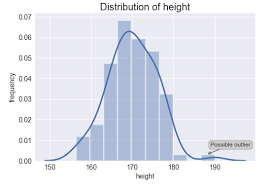

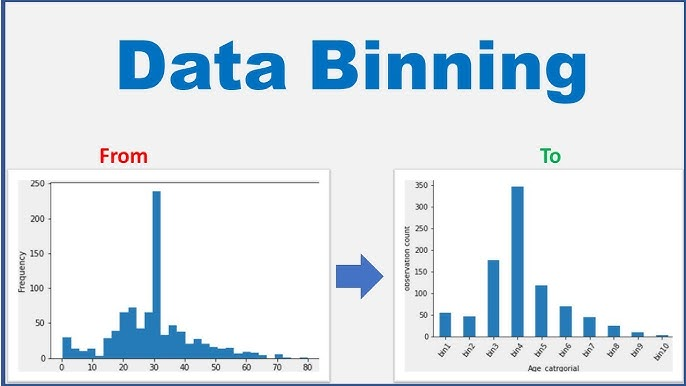

📌 Example 1: Equal-Width Binning for Age Groups
Let's categorize ages into different groups like Young, Adult, Senior using equal-width binning.

💡 Why Use This?
✅ Makes continuous data more interpretable.
✅ Useful in customer segmentation (e.g., age groups in marketing).




In [ ]:
import pandas as pd
import numpy as np

# Creating a dataset
df = pd.DataFrame({
    'Name': ['John', 'Alice', 'Robert', 'Maya', 'David', 'Sara'],
    'Age': [18, 25, 45, 60, 75, 30]
})

# Defining bin edges
bins = [0, 20, 40, 60, 80]
labels = ['Teen', 'Young Adult', 'Adult', 'Senior']

# Binning Age column
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

df

,Name,Age,Age Group
0,John,18,Teen
1,Alice,25,Young Adult
2,Robert,45,Adult
3,Maya,60,Adult
4,David,75,Senior
5,Sara,30,Young Adult


📌 Example 2: Equal-Frequency Binning for Salaries
In this method, each bin contains approximately the same number of data points.


💡 Why Use This?

✅ Ensures balanced bins even if data distribution is uneven.



In [ ]:
df = pd.DataFrame({
    'Employee': ['A', 'B', 'C', 'D', 'E', 'F'],
    'Salary': [30000, 50000, 70000, 90000, 110000, 130000]
})

# Binning into 3 groups of equal frequency
df['Salary Category'] = pd.qcut(df['Salary'], q=3, labels=['Low', 'Medium', 'High'])

df

,Employee,Salary,Salary Category
0,A,30000,Low
1,B,50000,Low
2,C,70000,Medium
3,D,90000,Medium
4,E,110000,High
5,F,130000,High


📌 Example 3: Custom Binning for Student Scores
We can manually define bins for grading students.


💡 Why Use This?

✅ Standardizes grading systems for performance analysis.

In [ ]:
df = pd.DataFrame({
    'Student': ['Amit', 'Neha', 'Rohan', 'Sara', 'Vikas', 'Priya'],
    'Marks': [35, 75, 90, 60, 85, 40]
})

# Defining bin edges and labels
bins = [0, 40, 60, 80, 100]
labels = ['Fail', 'Pass', 'Good', 'Excellent']

df['Grade'] = pd.cut(df['Marks'], bins=bins, labels=labels)
df

,Student,Marks,Grade
0,Amit,35,Fail
1,Neha,75,Good
2,Rohan,90,Excellent
3,Sara,60,Pass
4,Vikas,85,Excellent
5,Priya,40,Fail


📌 Example 4: Binning Population Density

We can categorize cities based on their population density.


💡 Why Use This?
✅ Helps in urban planning and resource allocation.


In [ ]:
df = pd.DataFrame({
    'City': ['Mumbai', 'New York', 'Tokyo', 'Sydney', 'Berlin'],
    'Density': [20000, 11000, 15000, 4000, 5000]  # People per sq km
})

# Defining density categories
bins = [0, 5000, 15000, 25000]
labels = ['Low', 'Medium', 'High']

df['Density Level'] = pd.cut(df['Density'], bins=bins, labels=labels)

df


,City,Density,Density Level
0,Mumbai,20000,High
1,New York,11000,Medium
2,Tokyo,15000,Medium
3,Sydney,4000,Low
4,Berlin,5000,Low


📌 Example 5: Binning House Prices into Affordable Ranges

💡 Why Use This?
✅ Makes housing data more interpretable for buyers.



In [ ]:
df = pd.DataFrame({
    'House': ['A', 'B', 'C', 'D', 'E'],
    'Price': [150000, 300000, 450000, 600000, 750000]
})

# Defining price categories
bins = [0, 250000, 500000, 1000000]
labels = ['Low', 'Medium', 'High']

df['Price Range'] = pd.cut(df['Price'], bins=bins, labels=labels)

df

,House,Price,Price Range
0,A,150000,Low
1,B,300000,Medium
2,C,450000,Medium
3,D,600000,High
4,E,750000,High


🔹 2️⃣ Identifying Outliers in Pandas

📖 What are Outliers?

Outliers are data points that significantly differ from the rest of the dataset. These values may be due to errors, unusual events, or true variations in the data.

Common Techniques to Identify Outliers:

Using the Interquartile Range (IQR) – Values outside 1.5 times the IQR are outliers.

Using Z-score – Values with a Z-score above 3 or below -3 are outliers.

📌 Example 1: Detecting Outliers Using IQR

💡 Why Use This?
✅ Robust against extreme values in skewed data.



In [ ]:
df = pd.DataFrame({'Sales': [100, 120, 130, 125, 500, 140, 135, 2000]})

Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
df['Outlier'] = (df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)

print(df)

   Sales  Outlier
0    100    False
1    120    False
2    130    False
3    125    False
4    500     True
5    140    False
6    135    False
7   2000     True


📌 Example 2: Detecting Outliers Using Z-score

💡 Why Use This?
✅ Best for normal distributions.



In [ ]:
from scipy import stats

df = pd.DataFrame({'Height': [150, 160, 170, 165, 155, 180, 190, 300]})

# Computing Z-score
df['Z-Score'] = np.abs(stats.zscore(df['Height']))

# Flagging outliers
df['Outlier'] = df['Z-Score'] > 3

df

,Height,Z-Score,Outlier
0,150,0.740073,False
1,160,0.520792,False
2,170,0.301511,False
3,165,0.411152,False
4,155,0.630433,False
5,180,0.082230,False
6,190,0.137051,False
7,300,2.549141,False


📌 Example 3: Replacing Outliers with Median

💡 Why Use This?
✅ Preserves data integrity without deleting rows.




In [ ]:
df = pd.DataFrame({'Temperature': [25, 26, 30, 27, 29, 50]})

# Using IQR method
Q1, Q3 = df['Temperature'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# Replacing outliers with median
median_value = df['Temperature'].median()
df.loc[(df['Temperature'] < lower_bound) | (df['Temperature'] > upper_bound), 'Temperature'] = median_value
df

,Temperature
0,25
1,26
2,30
3,27
4,29
5,28


📌 Example 4: Identifying Outliers in a Salary Dataset

💡 Why Use This?
✅ Helps in detecting fraud or reporting errors.



In [ ]:
df = pd.DataFrame({'Salary': [40000, 50000, 60000, 70000, 800000]})

# Finding outliers using IQR
Q1, Q3 = df['Salary'].quantile([0.25, 0.75])
IQR = Q3 - Q1
outliers = df[(df['Salary'] < (Q1 - 1.5 * IQR)) | (df['Salary'] > (Q3 + 1.5 * IQR))]

df

,Salary
0,40000
1,50000
2,60000
3,70000
4,800000


📌 Example 5: Visualizing Outliers Using Boxplot

💡 Why Use This?
✅ Quickly spots outliers in large datasets.

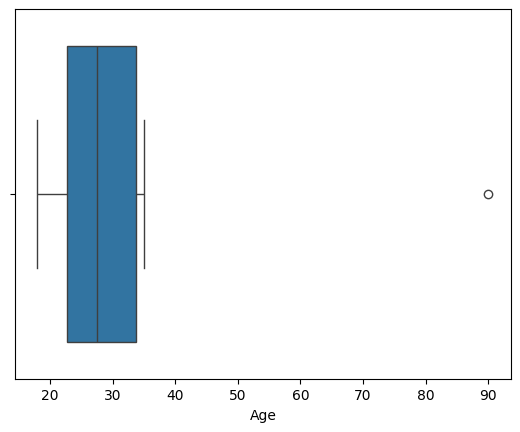

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({'Age': [18, 22, 25, 30, 35, 90]})

# Plotting boxplot
sns.boxplot(x=df['Age'])
plt.show()


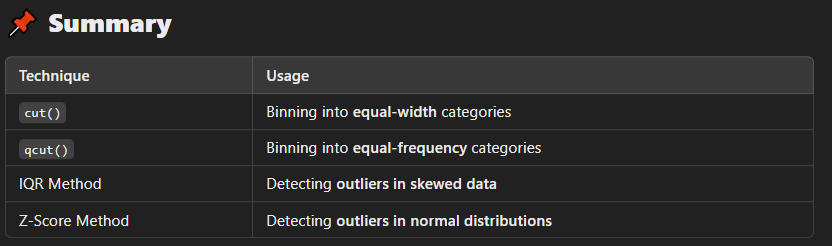

## 📌 Grouping Data (GroupBy with DataFrames and Dictionaries/Series)


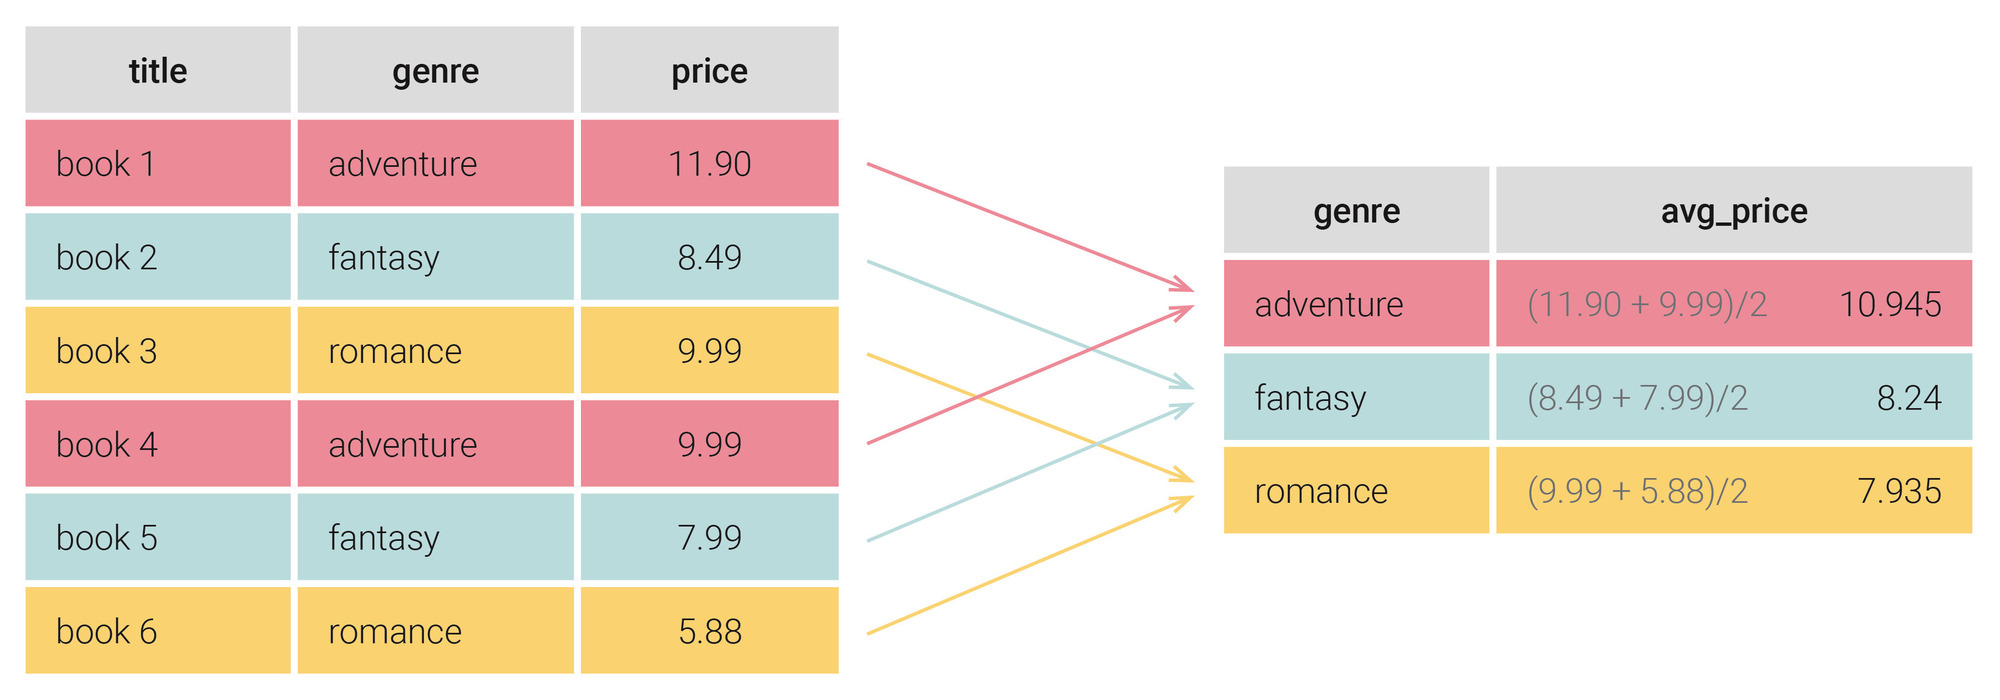

Grouping data is a fundamental operation in data analysis. It allows us to aggregate data by certain criteria, perform operations like sums, averages, or counts on groups of data, and gain deeper insights from our datasets. Pandas' groupby() function is a powerful tool that helps us split, apply, and combine data efficiently.



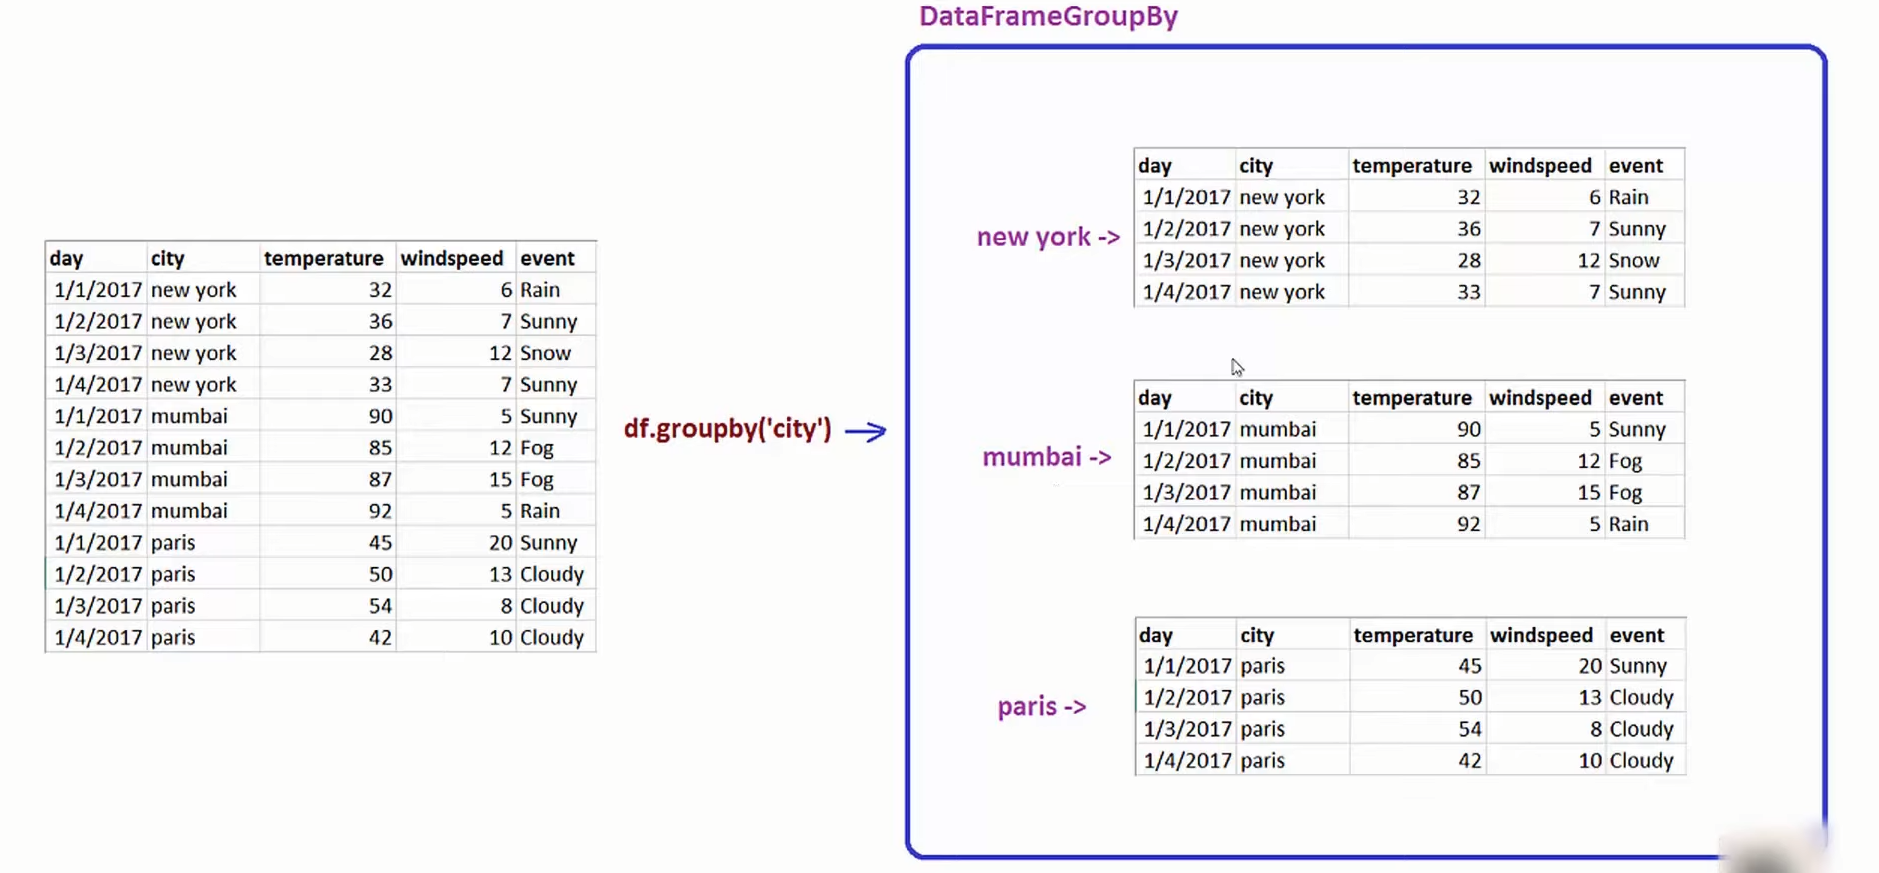

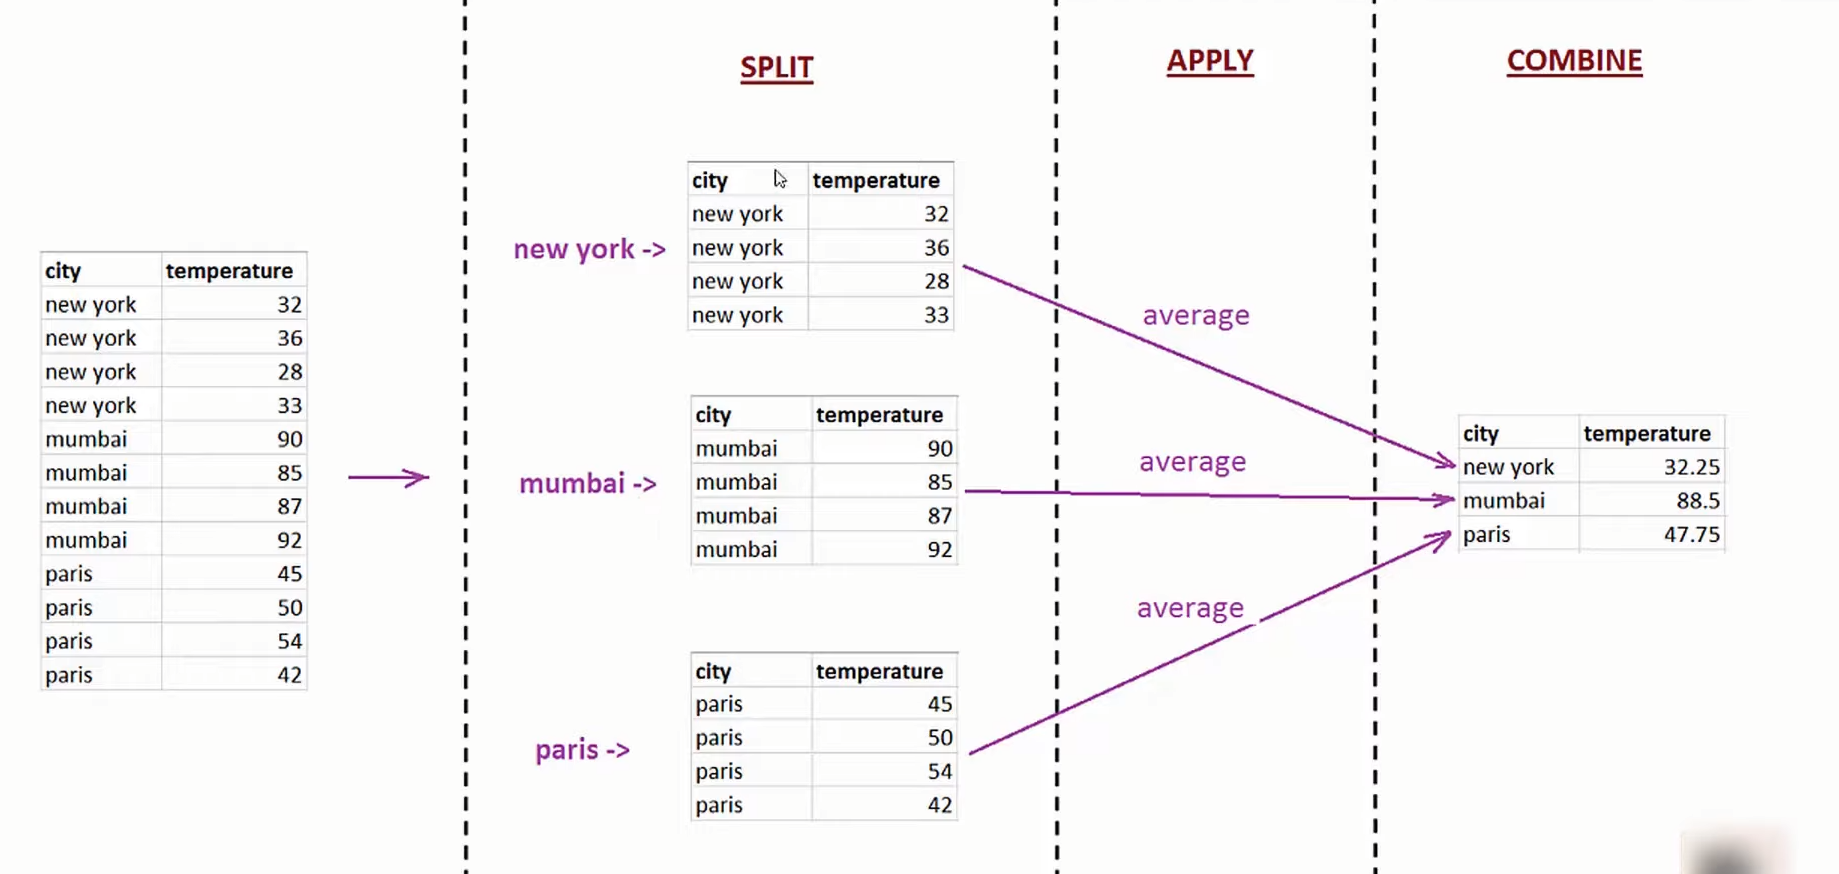

🔹 1️⃣ Understanding GroupBy

📖 What is GroupBy?

GroupBy in Pandas allows us to group data based on a key column (or multiple columns) and then perform an aggregation or transformation on each group separately. Essentially, it involves splitting the data, applying a function to each group, and then combining the results.

The typical groupby process involves:

Splitting the data into groups based on certain criteria.
Applying a function (such as sum, mean, count, etc.) to each group.
Combining the results back into a new structure.
This process is essential for summarizing data and extracting insights.

📌 Example 1: Grouping by One Column (Category-based Aggregation)
We have a dataset of employee sales and we want to know the total sales per department.

💡 Why Use This?
✅ Helps in summarizing data based on categorical variables.
✅ Essential in business reporting for performance analysis.



In [ ]:
import pandas as pd

# Sample data
df = pd.DataFrame({
    'Employee': ['John', 'Alice', 'Robert', 'Maya', 'David', 'Sara'],
    'Department': ['HR', 'Finance', 'HR', 'Finance', 'IT', 'HR'],
    'Sales': [2500, 5000, 3500, 4200, 5000, 3000]
})

print(df)

# Grouping by 'Department' and calculating total sales
department_sales = df.groupby('Department')['Sales'].sum()

department_sales

,Sales
Department,
Finance,9200
HR,9000
IT,5000


📌 Example 2: Grouping by Multiple Columns (More Complex Aggregation)
Now let's say we want to know the average sales per department and employee.

💡 Why Use This?
✅ Allows us to analyze multidimensional data and obtain more detailed summaries.

In [ ]:
# Grouping by multiple columns: 'Department' and 'Employee'
average_sales = df.groupby(['Department', 'Employee'])['Sales'].mean()

print(average_sales)

Department  Employee
Finance     Alice       5000.0
            Maya        4200.0
HR          John        2500.0
            Robert      3500.0
            Sara        3000.0
IT          David       5000.0
Name: Sales, dtype: float64


📌 Example 3: Applying Multiple Aggregation Functions

You can apply multiple aggregation functions to the same group to extract more insights, like mean and sum.


💡 Why Use This?
✅ Helps in multi-metric reporting, combining different summary statistics in one go.


In [ ]:
# Grouping by 'Department' and applying multiple aggregation functions
aggregation = df.groupby('Department')['Sales'].agg([sum, 'mean'])
print(aggregation)

             sum    mean
Department              
Finance     9200  4600.0
HR          9000  3000.0
IT          5000  5000.0


<ipython-input-51-47b448b74241>:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  aggregation = df.groupby('Department')['Sales'].agg([sum, 'mean'])


📌 Example 4: Grouping and Counting Data

Let's say we want to count how many employees are in each department.

💡 Why Use This?

✅ Helpful for inventory and resource management.

✅ Can be used for demographic analysis in marketing or HR.



In [ ]:
# Grouping by 'Department' and counting the number of employees
employee_count = df.groupby('Department')['Employee'].count()

print(employee_count)

Department
Finance    2
HR         3
IT         1
Name: Employee, dtype: int64


📌 Example 5: Grouping and Applying Custom Functions
You can also apply your own custom aggregation functions using the apply() method.


💡 Why Use This?

✅ Useful for advanced analyses when predefined aggregation functions don't fit the task.

✅ Great for applying domain-specific rules.

In [ ]:
# Defining a custom function to calculate the range (max - min) of sales
def sales_range(group):
    return group.max() - group.min()

# Applying the custom function to each department
sales_range_per_department = df.groupby('Department')['Sales'].apply(sales_range)


print(sales_range_per_department)

Department
Finance     800
HR         1000
IT            0
Name: Sales, dtype: int64


🔹 2️⃣ Grouping Data Using Series and Dictionaries
While groupby() is the most common approach, there are other ways to group data using Series and dictionaries. These methods can be useful when we need to group data manually or work with specific data structures.

📌 Example 1: Grouping Using Dictionaries
We can manually create a dictionary to specify the groupings.


💡 Why Use This?

✅ Allows for custom groupings that may not fit traditional groupby operations.

✅ Useful when the grouping logic is more complex or dynamic.



In [ ]:
# Creating a dictionary for grouping
group_dict = {'HR': ['John', 'Robert', 'Sara'], 'Finance': ['Alice', 'Maya'], 'IT': ['David']}

# Mapping the groups using dictionary
df['Department Manual'] = df['Employee'].map(lambda x: next(key for key, value in group_dict.items() if x in value))

print(df)

  Employee Department  Sales Department Manual
0     John         HR   2500                HR
1    Alice    Finance   5000           Finance
2   Robert         HR   3500                HR
3     Maya    Finance   4200           Finance
4    David         IT   5000                IT
5     Sara         HR   3000                HR


📌 Example 2: Grouping Using a Series
We can also group data by matching it to a Series of labels.

💡 Why Use This?

✅ Efficient for when the grouping logic is derived from external sources (e.g., labels from an external file).

In [ ]:
# Creating a series of labels for grouping
group_series = pd.Series(['HR', 'Finance', 'HR', 'Finance', 'IT', 'HR'], index=df.index)

# Adding the grouping information to the dataframe
df['Department Series'] = group_series
print(df)

  Employee Department  Sales Department Manual Department Series
0     John         HR   2500                HR                HR
1    Alice    Finance   5000           Finance           Finance
2   Robert         HR   3500                HR                HR
3     Maya    Finance   4200           Finance           Finance
4    David         IT   5000                IT                IT
5     Sara         HR   3000                HR                HR


📌 Example 3: Grouping by Date Using Series
If we have a dataset of sales and dates, we might want to group data by month or year.

💡 Why Use This?
✅ Helps in time-series analysis for trends across months, quarters, or years.

In [ ]:
# Sample dataset with dates
df = pd.DataFrame({
    'Date': pd.to_datetime(['2023-01-01', '2023-01-05', '2023-02-01', '2023-02-20', '2023-03-15']),
    'Sales': [2500, 3000, 4200, 5000, 6200]
})

# Grouping by Month using a Series
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Sales'].sum()


print(df)

        Date  Sales  Month
0 2023-01-01   2500      1
1 2023-01-05   3000      1
2 2023-02-01   4200      2
3 2023-02-20   5000      2
4 2023-03-15   6200      3


📌 Example 4: Using a Series to Map Multiple Groups
When you need to assign groups based on multiple criteria (e.g., age and gender), a Series can be useful for creating combined groupings.


💡 Why Use This?
✅ Allows for multifaceted groupings based on complex business or social conditions.



In [ ]:
# Sample dataset with age and gender
df = pd.DataFrame({
    'Name': ['John', 'Alice', 'Robert', 'Maya'],
    'Age': [25, 30, 20, 35],
    'Gender': ['Male', 'Female', 'Male', 'Female']
})

# Defining a combined grouping criterion
group_series = pd.Series(['Young Male', 'Adult Female', 'Young Male', 'Adult Female'], index=df.index)

# Adding the group series to the dataframe
df['Group'] = group_series

print(df)

     Name  Age  Gender         Group
0    John   25    Male    Young Male
1   Alice   30  Female  Adult Female
2  Robert   20    Male    Young Male
3    Maya   35  Female  Adult Female


📌 Example 5: Combining GroupBy with Aggregate Functions for Multiple Columns
In this case, let's say we want to find the average and maximum sales by department for each employee.


💡 Why Use This?
✅ Allows for multi-column aggregation in a single operation, which saves time and simplifies data analysis.


In [ ]:
# Grouping by 'Department' and applying multiple aggregation functions on multiple columns
df = pd.DataFrame({
    'Employee': ['John', 'Alice', 'Robert', 'Maya'],
    'Department': ['HR', 'Finance', 'HR', 'Finance'],
    'Sales': [2500, 5000, 3500, 4200],
    'Age': [25, 30, 20, 35]
})

aggregated_df = df.groupby('Department').agg({'Sales': ['mean', 'max'], 'Age': 'mean'})
print(aggregated_df)

             Sales         Age
              mean   max  mean
Department                    
Finance     4600.0  5000  32.5
HR          3000.0  3500  22.5


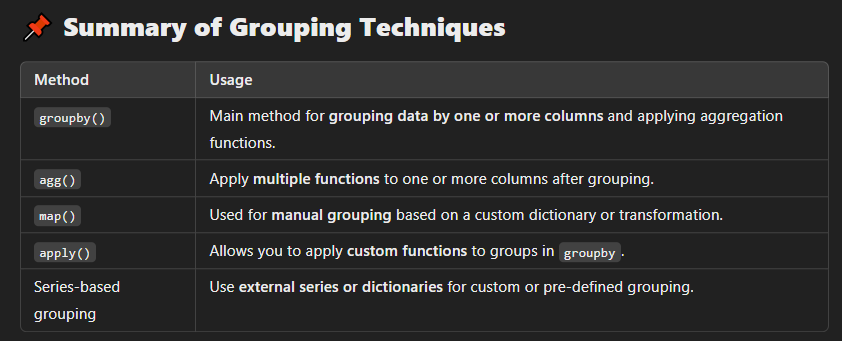

## 📌 Aggregation and Cross Tabulation in Pandas



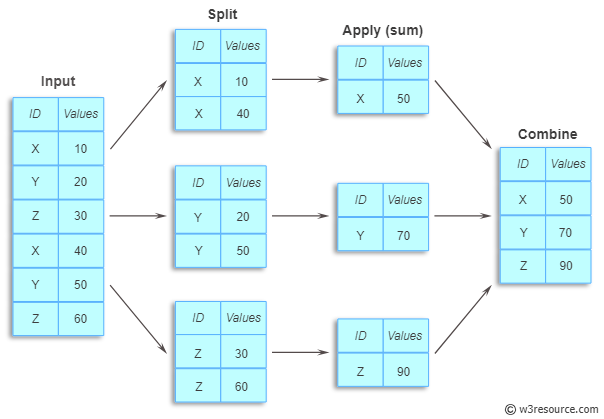

Aggregation and cross-tabulation are powerful techniques in data analysis that help summarize data efficiently.

Aggregation refers to computing summary statistics (sum, mean, count, etc.) for groups of data.
Cross-tabulation (crosstab) is used to analyze relationships between categorical variables in a tabular format.
Both techniques are essential for business intelligence, financial reports, and statistical analysis.

🔹 1️⃣ Aggregation in Pandas

📖 What is Aggregation?

Aggregation means computing summary statistics for groups of data.

For example, if you have sales data by department, aggregation can give you total sales per department.

Pandas provides multiple ways to aggregate data:

.sum() – Computes the sum of values in each group.

.mean() – Calculates the average value per group.

.count() – Counts the number of occurrences per group.

.agg() – Allows applying multiple functions to a dataset.


📌 Example 1: Basic Aggregation using groupby()
We have a dataset of store sales and want to calculate total and average sales per store.

💡 Why Use This?
✅ Helps in performance analysis of different stores.
✅ Used for revenue tracking in businesses.


In [ ]:
import pandas as pd

# Sample data
df = pd.DataFrame({
    'Store': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Sales': [1000, 2000, 1500, 1800, 1200, 2200]
})

# Aggregation: Total and Average Sales per Store
total_sales = df.groupby('Store')['Sales'].sum()
average_sales = df.groupby('Store')['Sales'].mean()

print("Total Sales per Store:")
print(total_sales)
print("\nAverage Sales per Store:")
print(average_sales)

Total Sales per Store:
Store
A    3000
B    3300
C    3400
Name: Sales, dtype: int64

Average Sales per Store:
Store
A    1500.0
B    1650.0
C    1700.0
Name: Sales, dtype: float64


📌 Example 2: Aggregating Multiple Columns with Multiple Functions

Let's say we have store revenue and number of customers, and we want to compute total revenue, average revenue, and total customers per store.

💡 Why Use This?

✅ Allows for multi-metric analysis in a single operation.

✅ Used in business reporting for KPIs.

In [ ]:
# Sample data
df = pd.DataFrame({
    'Store': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Revenue': [5000, 7000, 4500, 6200, 5200, 7800],
    'Customers': [200, 300, 250, 280, 220, 330]
})

# Aggregating multiple columns with multiple functions
store_summary = df.groupby('Store').agg({'Revenue': ['sum', 'mean'], 'Customers': 'sum'})

print("Store Summary:")
print(store_summary)

Store Summary:
      Revenue         Customers
          sum    mean       sum
Store                          
A       12000  6000.0       500
B       10700  5350.0       530
C       13000  6500.0       550


📌 Example 3: Using agg() with Custom Functions

We want to find the range of revenue per store (max - min).

💡 Why Use This?

✅ Useful when predefined functions like sum() or mean() don't fit the requirement.



In [ ]:
# Custom function to calculate range
def revenue_range(series):
    return series.max() - series.min()

# Applying custom function
revenue_range_per_store = df.groupby('Store')['Revenue'].agg(revenue_range)

print("Revenue Range per Store:")
print(revenue_range_per_store)

Revenue Range per Store:
Store
A    2000
B    1700
C    2600
Name: Revenue, dtype: int64


📌 Example 4: Aggregating Data with Filtering Conditions
We want to find total revenue only for stores where revenue exceeded 5000 at least once.

💡 Why Use This?
✅ Helps in identifying top-performing stores.

In [ ]:
# Filtering and aggregating
filtered_agg = df[df['Revenue'] > 5000].groupby('Store')['Revenue'].sum()

print("Filtered and Aggregated Data:")
print(filtered_agg)

Filtered and Aggregated Data:
Store
A     7000
B     6200
C    13000
Name: Revenue, dtype: int64


📌 Example 5: Aggregation with Multiple Grouping Columns
Now, let's analyze sales by store and region.



💡 Why Use This?

✅ Useful for multi-level analysis, such as sales per store per region.


In [ ]:
df = pd.DataFrame({
    'Store': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Region': ['North', 'South', 'North', 'South', 'North', 'South'],
    'Sales': [1000, 2000, 1500, 1800, 1200, 2200]
})

# Aggregating by Store and Region
sales_summary = df.groupby(['Store', 'Region'])['Sales'].sum()

print("Sales Summary by Store and Region:")
print(sales_summary)

Sales Summary by Store and Region:
Store  Region
A      North     1000
       South     2000
B      North     1500
       South     1800
C      North     1200
       South     2200
Name: Sales, dtype: int64


🔹 2️⃣ Cross Tabulation (crosstab)

📖 What is Cross Tabulation?

Cross-tabulation (or contingency table) is used to summarize categorical data.

It helps in understanding relationships between two categorical variables.

Pandas provides pd.crosstab() for cross-tabulation.



📌 Example 1: Analyzing Product Sales by Store
Let's see how many units of each product were sold in different stores.

💡 Why Use This?
✅ Helps in product sales analysis per store.


In [ ]:
df = pd.DataFrame({
    'Store': ['A', 'A', 'B', 'B', 'C', 'C', 'A', 'B'],
    'Product': ['TV', 'Laptop', 'TV', 'Phone', 'Laptop', 'Phone', 'Phone', 'TV'],
    'Units Sold': [5, 10, 8, 15, 12, 20, 7, 9]
})

# Cross Tabulation: Number of Units Sold per Product per Store
product_sales = pd.crosstab(df['Store'], df['Product'], values=df['Units Sold'], aggfunc='sum')

print("Product Sales by Store:")
print(product_sales)

Product Sales by Store:
Product  Laptop  Phone    TV
Store                       
A          10.0    7.0   5.0
B           NaN   15.0  17.0
C          12.0   20.0   NaN


📌 Example 2: Counting Employee Distribution Across Departments

Let's say we have employees working in different departments across various cities.

💡 Why Use This?
✅ Helps HR managers analyze workforce distribution.



In [ ]:
df = pd.DataFrame({
    'Employee': ['John', 'Alice', 'Robert', 'Maya', 'David', 'Sara'],
    'City': ['NY', 'LA', 'NY', 'LA', 'SF', 'SF'],
    'Department': ['HR', 'Finance', 'HR', 'Finance', 'IT', 'HR']
})

# Cross Tabulation: Employee Count per Department per City
department_distribution = pd.crosstab(df['City'], df['Department'])

print("Department Distribution by City:")
print(department_distribution)

Department Distribution by City:
Department  Finance  HR  IT
City                       
LA                2   0   0
NY                0   2   0
SF                0   1   1


 Example 3: Analyzing Customer Ratings by Product Category

We want to analyze customer ratings for different product categories.

💡 Why Use This?
✅ Helps in understanding customer feedback trends.



In [ ]:
df = pd.DataFrame({
    'Customer': ['A', 'B', 'C', 'D', 'E', 'F'],
    'Category': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Home', 'Home'],
    'Rating': [5, 3, 4, 2, 5, 4]
})

# Cross Tabulation: Count of Ratings per Category
rating_distribution = pd.crosstab(df['Category'], df['Rating'])

print("Rating Distribution by Category:")
print(rating_distribution)

Rating Distribution by Category:
Rating       2  3  4  5
Category               
Clothing     1  1  0  0
Electronics  0  0  1  1
Home         0  0  1  1


📌 Example 4: Cross Tabulation with Normalization
We can normalize the results to show percentages instead of counts.


💡 Why Use This?
✅ Useful for relative comparisons instead of raw numbers.



In [ ]:
# Normalized crosstab (percentage of each category)
normalized_crosstab = pd.crosstab(df['Category'], df['Rating'], normalize='index')

print("Normalized Crosstab:")
print(normalized_crosstab)

Normalized Crosstab:
Rating         2    3    4    5
Category                       
Clothing     0.5  0.5  0.0  0.0
Electronics  0.0  0.0  0.5  0.5
Home         0.0  0.0  0.5  0.5


📌 Example 5: Cross Tabulation with Multiple Variables

Let's analyze how product categories and customer age groups influence sales.


💡 Why Use This?
✅ Helps in market segmentation and customer analysis.

In [ ]:
df = pd.DataFrame({
    'Customer': ['A', 'B', 'C', 'D', 'E', 'F'],
    'Category': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Home', 'Home'],
    'Age Group': ['20-30', '30-40', '20-30', '40-50', '30-40', '40-50'],
    'Sales': [500, 300, 700, 200, 600, 800]
})

# Cross Tabulation: Sales by Category and Age Group
sales_crosstab = pd.crosstab(df['Category'], df['Age Group'], values=df['Sales'], aggfunc='sum')

print("Sales by Category and Age Group:")
print(sales_crosstab)

Sales by Category and Age Group:
Age Group     20-30  30-40  40-50
Category                         
Clothing        NaN  300.0  200.0
Electronics  1200.0    NaN    NaN
Home            NaN  600.0  800.0


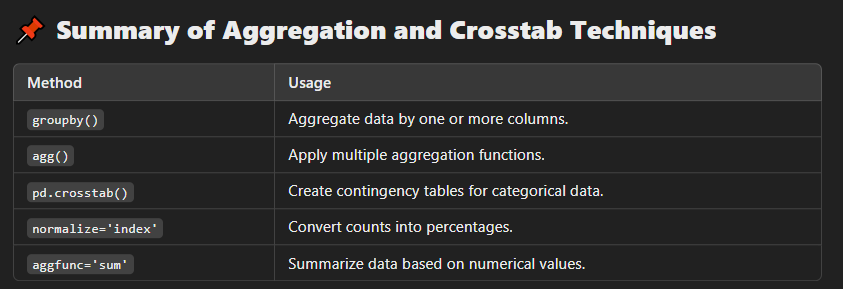

## 📌 Time Series Analysis: Basic Operations in Pandas

📖 What is Time Series Analysis?

Time series data is a sequence of data points recorded over time at regular intervals.

Examples include stock prices, weather data, sales trends, and sensor readings.

In Pandas, time series analysis involves:

Handling datetime data

Resampling & frequency conversion

Rolling window operations (moving averages, trends)

Lagging and differencing

Handling missing time data

Time series analysis is widely used in finance, forecasting, and IoT analytics.

🔹 1️⃣ Working with DateTime in Pandas

📖 What is DateTime Handling?

Before performing time-based analysis, we need to ensure our date column is in datetime format.

Pandas provides:

pd.to_datetime() – Converts text dates to datetime format.
dt accessor – Extracts year, month, day, weekday, etc.


📌 Example 1: Converting a Column to DateTime Format
We have a dataset of daily sales stored as strings. We need to convert it to datetime format.

💡 Why Use This?
✅ Required for sorting, filtering, and grouping time-based data.

In [ ]:
import pandas as pd

# Sample data
df = pd.DataFrame({
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04'],
    'Sales': [100, 150, 200, 130]
})

# Convert to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()


print(df)

        Date  Sales  Year  Month    Weekday
0 2024-01-01    100  2024      1     Monday
1 2024-01-02    150  2024      1    Tuesday
2 2024-01-03    200  2024      1  Wednesday
3 2024-01-04    130  2024      1   Thursday


🔹 2️⃣ Resampling and Frequency Conversion

📖 What is Resampling?

Resampling allows us to change the frequency of time-series data (e.g., daily data to weekly/monthly).

Common resampling methods:

.resample('M') → Resample to monthly frequency

.resample('W') → Resample to weekly frequency

.resample('Q') → Resample to quarterly frequency





📌 Example 3: Resampling Daily Sales Data to Monthly Sales
We want to convert daily sales data into monthly totals.

💡 Why Use This?
✅ Helps in business reporting (monthly sales analysis).

In [ ]:
# Resampling daily sales data to monthly
monthly_sales = df.resample('M', on='Date')['Sales'].sum()

print(monthly_sales)

Date
2024-01-31    580
Freq: ME, Name: Sales, dtype: int64


<ipython-input-75-b97af29ab951>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date')['Sales'].sum()


📌 Example 4: Resampling to Weekly Average Sales
We need to convert daily sales into weekly averages.


💡 Why Use This?
✅ Useful for tracking trends in sales or user activity.

In [ ]:
# Resampling daily sales data to weekly
weekly_sales = df.resample('W', on='Date')['Sales'].mean()

print(weekly_sales)

Date
2024-01-07    145.0
Freq: W-SUN, Name: Sales, dtype: float64


🔹 3️⃣ Moving Averages & Rolling Windows

📖 What is a Rolling Window?

A rolling window helps smooth fluctuations in time series data by computing statistics over a fixed period.

Common rolling operations:

.rolling(window=3).mean() → 3-day moving average

.rolling(window=7).sum() → 7-day cumulative total


📌 Example 5: Calculating a 3-Day Moving Average of Sales
We want to analyze the trend of sales over time using a moving average.

💡 Why Use This?
✅ Helps in detecting trends and smoothing short-term fluctuations.



In [ ]:
# Calculate 3-day moving average
df['3-day Moving Avg'] = df['Sales'].rolling(window=3).mean()

print(df)

        Date  Sales  Year  Month    Weekday  3-day Moving Avg
0 2024-01-01    100  2024      1     Monday               NaN
1 2024-01-02    150  2024      1    Tuesday               NaN
2 2024-01-03    200  2024      1  Wednesday             150.0
3 2024-01-04    130  2024      1   Thursday             160.0


📌 Example 6: 7-Day Cumulative Sales Sum
We want to track the total sales for the past 7 days.

💡 Why Use This?
✅ Used in tracking revenue over a specific time window.



In [ ]:
# 7-day cumulative sum
df['7-day Cumulative Sales'] = df['Sales'].rolling(window=7).sum()

print(df)

        Date  Sales  Year  Month    Weekday  3-day Moving Avg  \
0 2024-01-01    100  2024      1     Monday               NaN   
1 2024-01-02    150  2024      1    Tuesday               NaN   
2 2024-01-03    200  2024      1  Wednesday             150.0   
3 2024-01-04    130  2024      1   Thursday             160.0   

   7-day Cumulative Sales  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  


🔹 4️⃣ Lagging and Differencing

📖 What is Lagging & Differencing?

Lagging shifts data to compare current vs. past values.
Differencing calculates the change between consecutive values to remove trends.




📌 Example 7: Lagging Sales by 1 Day
We compare current sales with previous day's sales.

💡 Why Use This?
✅ Helps in predicting future trends based on past data.




In [ ]:
# Lagging sales by 1 day
df['Previous Day Sales'] = df['Sales'].shift(1)

print(df)

        Date  Sales  Year  Month    Weekday  3-day Moving Avg  \
0 2024-01-01    100  2024      1     Monday               NaN   
1 2024-01-02    150  2024      1    Tuesday               NaN   
2 2024-01-03    200  2024      1  Wednesday             150.0   
3 2024-01-04    130  2024      1   Thursday             160.0   

   7-day Cumulative Sales  Previous Day Sales  
0                     NaN                 NaN  
1                     NaN               100.0  
2                     NaN               150.0  
3                     NaN               200.0  


📌 Example 8: Calculating the Daily Change in Sales
We want to measure daily sales fluctuations.

💡 Why Use This?

✅ Used in stock price analysis, economic forecasting.



In [ ]:
# Differencing to calculate daily change
df['Sales Change'] = df['Sales'].diff()

print(df)

        Date  Sales  Year  Month    Weekday  3-day Moving Avg  \
0 2024-01-01    100  2024      1     Monday               NaN   
1 2024-01-02    150  2024      1    Tuesday               NaN   
2 2024-01-03    200  2024      1  Wednesday             150.0   
3 2024-01-04    130  2024      1   Thursday             160.0   

   7-day Cumulative Sales  Previous Day Sales  Sales Change  
0                     NaN                 NaN           NaN  
1                     NaN               100.0          50.0  
2                     NaN               150.0          50.0  
3                     NaN               200.0         -70.0  


🔹 5️⃣ Handling Missing Time Series Data

📖 What if Some Dates Are Missing?

Missing values can occur when data is not recorded every day.
Pandas allows:

Forward fill (ffill()) → Fill missing values with the last known value.

Backward fill (bfill()) → Fill missing values with the next known value.

Interpolation → Estimates missing values based on surrounding values.

📌 Example 9: Filling Missing Dates Using Forward Fill
We have a dataset where some dates are missing.

💡 Why Use This?
✅ Prevents data loss when performing time-based analysis.


In [ ]:
# Fill missing values with forward fill
df['Sales'] = df['Sales'].fillna(method='ffill')

print(df)

        Date  Sales  Year  Month    Weekday  3-day Moving Avg  \
0 2024-01-01    100  2024      1     Monday               NaN   
1 2024-01-02    150  2024      1    Tuesday               NaN   
2 2024-01-03    200  2024      1  Wednesday             150.0   
3 2024-01-04    130  2024      1   Thursday             160.0   

   7-day Cumulative Sales  Previous Day Sales  Sales Change  
0                     NaN                 NaN           NaN  
1                     NaN               100.0          50.0  
2                     NaN               150.0          50.0  
3                     NaN               200.0         -70.0  


<ipython-input-81-40628e69bd5d>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Sales'] = df['Sales'].fillna(method='ffill')


📌 Example 10: Interpolating Missing Values
We want to estimate missing sales values.

💡 Why Use This?
✅ Useful in sensor data analysis, stock market data.



In [ ]:
# Interpolate missing values
df['Sales'] = df['Sales'].interpolate()

print(df)

        Date  Sales  Year  Month    Weekday  3-day Moving Avg  \
0 2024-01-01    100  2024      1     Monday               NaN   
1 2024-01-02    150  2024      1    Tuesday               NaN   
2 2024-01-03    200  2024      1  Wednesday             150.0   
3 2024-01-04    130  2024      1   Thursday             160.0   

   7-day Cumulative Sales  Previous Day Sales  Sales Change  
0                     NaN                 NaN           NaN  
1                     NaN               100.0          50.0  
2                     NaN               150.0          50.0  
3                     NaN               200.0         -70.0  


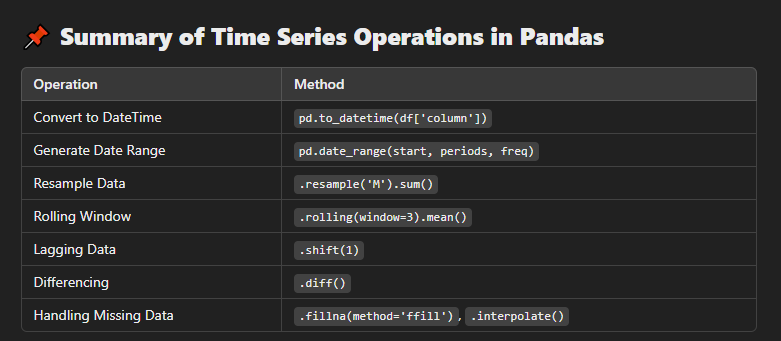